# SOCIAL GRAPHS AND INTERACTIONS - 2016

# PROJECT : ***"BAD NEWS TRAVELS FAST"***

# 1 - IMPORTING USED LIBRARIES

In [2]:
import twitter
import json
import io
import pymongo
import urlparse
import nltk
import numpy as np
from __future__ import division
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk import tokenize
from scipy.sparse import lil_matrix
sid=SIA()
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# 2 - COLLECTING TWEETS
## 2.1 - CONNECTING TO TWEETER API

In [3]:
# Connection to Twitter API
import twitter
import json
import io
import pymongo


def oauth_login():
    
    CONSUMER_KEY = ' '
    CONSUMER_SECRET = ' '
    OAUTH_TOKEN = ' '
    OAUTH_TOKEN_SECRET = ' '
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

twitter_api = oauth_login()

## 2.2 - LOOKING FOR TWEETS WITH 'airpod'

In [4]:
#Creating list to store collected tweets
statuses2 = []

In [52]:
import time 
twittes_list = []
#time.sleep(10)
while True:

    def twitter_search(twitter_api, q, max_results=1000, **kw):

        search_results = twitter_api.search.tweets(q=q, count=100, **kw)

        statuses = search_results['statuses']

        max_results = min(1000, max_results)
        tweet_count = 0

        for _ in range(10):
            try:
                next_results = search_results['search_metadata']['next_results']
            except KeyError, e: 
                break

            next_results = urlparse.parse_qsl(next_results[1:])
            kwargs = dict(next_results)

            search_results = twitter_api.search.tweets(**kwargs)
            statuses += search_results['statuses']

            tweet_count += 100
            #print tweet_count
            twittes_list.append(statuses)

            #if len(statuses) > max_results: 
            #    break

        return statuses


    twitter_api = oauth_login()
    print "Authed to Twitter. Searching now..."

    q = "airpod" | "apple"

    results = twitter_search(twitter_api, q, max_results=1000)

    
    count = 0
    for i in results:
        if i not in statuses2:
            statuses2.append(i)
            count +=1
    print "%.3f Tweets were collected"% len(statuses2) 


Authed to Twitter. Searching now...
38952 Tweets were collected


In [216]:
print "Quantity of keys in Retweets:", len(statuses2[0].keys())
print
print "Keys in Retweets:\n"
for key in statuses2[0].keys():
    print key

Quantity of keys in Retweets: 25

Keys in Retweets:

contributors
truncated
text
is_quote_status
in_reply_to_status_id
id
favorite_count
entities
retweeted
coordinates
source
in_reply_to_screen_name
in_reply_to_user_id
retweet_count
id_str
favorited
user
geo
in_reply_to_user_id_str
possibly_sensitive
lang
created_at
in_reply_to_status_id_str
place
metadata


In [217]:
print "Quantity of keys in a non-Retweeted Tweet:", len(statuses2[1].keys())
print
print "Keys in Retweets:\n"
for key in statuses2[1].keys():
    print key

Quantity of keys in a non-Retweeted Tweet: 26

Keys in Retweets:

contributors
truncated
text
is_quote_status
in_reply_to_status_id
id
favorite_count
entities
retweeted
coordinates
source
in_reply_to_screen_name
in_reply_to_user_id
retweet_count
id_str
favorited
user
geo
in_reply_to_user_id_str
possibly_sensitive
lang
created_at
in_reply_to_status_id_str
place
extended_entities
metadata


<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

<font color='blue' size='4pts'>
**Analysing the tweets keys of the collected tweets, I decided to store in my database the following attributes:**
</font>

<p />

<font color='blue' size='5pts'>**Information about the tweet:**</font>
<font color='blue' size='3pts'>
<p />t_id = tweet['id']                                               #ID of the tweet 
<p />text = tweet['text']                                             #text of the tweet (target of sentiment analysis)
<p />retweet = tweet['retweet_count']                                 #number of times the original tweet was retweeted
<p />time = tweet['created_at']                                       #date/time the tweet was created
<p />user = tweet['user']['screen_name']                              #alias of the user that posted the tweet
<p />lang = tweet['lang']                                             #language set at the user's profile
</font>
<p />
<p />
<font color='blue' size='5pts'>**If the tweet is a retweet, it also has the following attributes:**</font>
<font color='blue' size='3pts'>
<p />
<p />original_id = tweet['retweeted_status']['id']                    #ID of the original tweet
<p />original_time = tweet['retweeted_status']['created_at']          #date/time the the original tweet was created
<p />original_user = tweet['retweeted_status']['user']['screen_name'] #alias of the user that posted the original tweet
</font>


<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

## 2.3 - CONNECTING TO THE DATABASE

In [36]:
import sqlite3

conn=sqlite3.connect("tweets_final.db")
c=conn.cursor()

## 2.4 - CREATING TABLE ON DB TO STORE ATTRIBUTES OF COLLECTED TWEETS

<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>
<p>
<font color='blue' size='4pts'>
**The database table was created considering the attributes described above.**
</font>
<p>
<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

In [533]:
c.execute("CREATE TABLE Tweets (t_id INTEGER, text TEXT, retweet INTEGER, time TEXT, lang TEXT, user TEXT, original_id INTEGER, original_time TEXT, original_user TEXT, original_text TEXT, mood TEXT  )")
conn.commit()

## 2.5 - SENTIMENT ANALYSIS

In [6]:
def sentimentScore(text):
    #for row in text:
    ss = sid.polarity_scores(text)

    if ss['pos'] > ss['neg']:
        return 'positive'
        #pos.append(row)
    else:
        return 'negative'
        #neg.append(row)
    #count += 1

<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>
<p>
<font color='blue' size='4pts'>
To determine the mood of a tweet, we use the **NLTK Function SentimentIntensityAnalyzer**. The function looks at how many **positive**, **negative** or **neutral** words a text contains and gives it a score based on that. I applyed the function as can be seen bellow, spliting the positive and the negative tweetes in two different lists and desconsidered the neutral results. 
</font>
<p>
<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

## 2.6 - STORING ON THE DB THE SELECTED ATTRIBUTES FROM THE TWEETS

In [42]:
#Recording results to a database
counter = 0
db_list = []
l = len(statuses2)

for i in range(l):
    t_id = statuses2[i]['id']
    text = statuses2[i]['text']
    retweet = statuses2[i]['retweet_count']
    time = statuses2[i]['created_at']
    lang = statuses2[i]['lang']
    user = statuses2[i]['user']['screen_name']
    mood = sentimentScore(text)
    
    if 'retweeted_status' in statuses2[i].keys():
        original_id = statuses2[i]['retweeted_status']['id']
        original_time = statuses2[i]['retweeted_status']['created_at']
        original_user = statuses2[i]['retweeted_status']['user']['screen_name']
    else:
        original_id = 0
        original_time = 0
        original_user = 0

    if t_id in db_list: continue
    else:
        db_list.append( (t_id, text, retweet, time, lang, user, original_id, original_time, original_user, mood) )

    counter += 1
        
c.executemany("INSERT INTO Tweets VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", db_list)
    
conn.commit()

print 'Total of tweets stored in your database', counter

Total of tweets stored in your database 38952


<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>
<p>
<font color='blue' size='4pts'>
Like not all the tweets were retweeted, consequently not all of them have the attributes **'retweeted_status'** and the ones related to it, these ones were included into an **'if'** clause and the analysed tweet does not have it, they are set the value **zero**, in order to make it easiar to retrieve the data from the database later, filtering only the retweeted tweets.
</font>
<p>
<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

## 2.5 - CHECKING THE TOTAL QUANTITY OF COLLECTED TWEETS

In [8]:
with conn:
    cur = conn.cursor()
    cur.execute('SELECT * FROM Tweets')
    tweets = cur.fetchall()
    count = 0
    for row in tweets:
        #print row
        count +=1
print 'Collected Tweets:',count

Collected Tweets: 38952


# 3 - SENTIMENT ANALYSIS
## 3.1 - PERFORMING SENTIMENT ANALYSIS ON ALL THE COLLECTED TWEETS

In [ ]:
def sentimentScore(text):
    
    ss = sid.polarity_scores(text)

    if ss['pos'] > ss['neg']:
        mood = 'positive'
    else:
        mood = 'negative'
    

<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>
<p>
<font color='blue' size='4pts'>
To determine the mood of a tweet, we use the **NLTK Function SentimentIntensityAnalyzer**. The function looks at how many **positive**, **negative** or **neutral** words a text contains and gives it a score based on that. I applyed the function as can be seen bellow, spliting the positive and the negative tweetes in two different lists and desconsidered the neutral results. 
</font>
<p>
<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

# 3 - RETRIEVING DATA TO PERFORM ANALYSIS
## 3.1 - RETRIEVING ALL TWEETS COLLECTED AND PERFORMING SENTIMENT ANALYSIS

In [41]:
#Running Sentiment Analysis only on the Retweeted tweets

pos = []
neg = []

with conn:
    cur = conn.cursor()
    cur.execute('SELECT t_id,text,retweet,time,user,original_id,original_time,original_user FROM Tweets')
    
    count = 0
    all = cur.fetchall()
    l_all = len(all)
                
    print "Total of analysed Tweets:",l_all

    for row in all:
        ss = sid.polarity_scores(row[1])

        if ss['pos'] > ss['neg']:
            pos.append(row)
        else:
            neg.append(row)
        count += 1

print
print "Quantity of Positive Tweets:", len(pos)
print "Quantity of Negative Tweets:", len(neg)


Total of analysed Tweets: 38952

Quantity of Positive Tweets: 8631
Quantity of Negative Tweets: 30321


In [80]:
#Running Sentiment Analysis only on the Retweeted tweets

pos = []
neg = []

with conn:
    cur = conn.cursor()
    cur.execute('SELECT t_id,text,retweet,time,user,original_id,original_time,original_user FROM Tweets')
    
    count = 0
    all = cur.fetchall()
    l_all = len(all)
                
    print "Total of analysed Tweets:",l_all

    for row in all:
        ss = sid.polarity_scores(row[1])

        if ss['pos'] > ss['neg']:
            pos.append(row)
        else:
            neg.append(row)
        count += 1

print
print "Quantity of Positive Tweets:", len(pos)
print "Quantity of Negative Tweets:", len(neg)


Total of analysed Tweets: 4827

Quantity of Positive Tweets: 535
Quantity of Negative Tweets: 4292


In [83]:
print "Percentual of POSITIVE tweets: %3f" % ((len(pos)/len(all))*100)
print "Percentual of NEGATIVE tweets: %3f" % ((len(neg)/len(all))*100)

Percentual of POSITIVE tweets: 11.083489
Percentual of NEGATIVE tweets: 88.916511


<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>
<p>
<font color='blue' size='5pts'>
** Conclusion based on the quantity of tweets after the sentiment analysis:**
</font>
<p/>
<font color='blue' size='4pts'>
The smashing amount of negative comments compared to the positive ones shows a clear tendency that people share publicaly more "bad news" or "negative comments" than good or positive ones.
</font>
<p>
<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

## 3.2 - PERFORMING SENTIMENT ANALYSIS ONLY ON RETWEETED TWEETS

In [234]:
print "Different Keys in a Retweets:\n"
for key in statuses2[9].keys():
    if key not in statuses2[1].keys():
        print key

Different Keys in a Retweets:

retweeted_status


<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>
<p>
<font color='blue' size='4pts'>
Like mentioned before, by analysing the attribute **'retweeted'** one can observe that not all collected tweets were retweeted, for these, the value of this attribute will be equal to "False", but for the ones which were retweeted, the value of this attribute will be equal to "True".
<p />
Analysing the retweeted tweets (**retweeted: "True"**), one can observe how many times a respective tweet was retweeted by observing another attribute **'retweet_count'**. And also, as we can see on the cell above, the retweeted tweets have more attributes more then the non-retweeted ones and it is in one of them, called **'retweeted_status'** that we can find all the information about the original tweets. So, differently of what was done above, here I am pulling out from the database only the tweets which value of **'origial_id'** is not zero. As I mentioned before, when storing the tweets on the database, I set zero to the value of this attribute of the tweets that were never retweeted.
<p>
After all of this, it is possible to perform the sentiment analysis only to the amount of tweets which are known as retweeted.**
</font>
<p>
<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

In [53]:
#Running Sentiment Analysis only on the Retweeted tweets

pos1 = []
neg1 = []

with conn:
    cur = conn.cursor()
    cur.execute('SELECT DISTINCT t_id,text,retweet,time,user,original_id,original_time,original_user FROM Tweets WHERE original_time != 0')
    
    count = 0
    retweeted = cur.fetchall()
    l_retweeted = len(retweeted)
    print "Total of analysed Tweets:",l_retweeted

    for row in retweeted:
        ss = sid.polarity_scores(row[1])

        if ss['pos'] > ss['neg']:
            pos1.append(row)
        else:
            neg1.append(row)
        count += 1

print
print "Quantity of Positive Tweets:", len(pos1)
print "Quantity of Negative Tweets:", len(neg1)


Total of analysed Tweets: 222

Quantity of Positive Tweets: 50
Quantity of Negative Tweets: 172


### 3.2.1 - QUANTITY ANALYSIS

In [84]:
print "Percentual of POSITIVE tweets: %3f" % ((len(pos1)/len(retweeted))*100)
print
print "Percentual of NEGATIVE tweets: %3f" % ((len(neg1)/len(retweeted))*100)

Percentual of POSITIVE tweets: 22.522523

Percentual of NEGATIVE tweets: 77.477477


In [82]:
#Percentual of reduction of the amount of the data
pr = 100-(l_retweeted*100/l_all)
print "Total of collected data:", l_all
print "Total of retweeted tweets:", l_retweeted
print "Percentual of reduction of the amount of the data after filters for 'airpod':", pr

Total of collected data: 4827
Total of retweeted tweets: 222
Percentual of reduction of the amount of the data after filters for 'airpod': 95.4008701057


<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>
<p>
<font color='blue' size='5pts'>
**Conclusion based on the quantity of retweeted tweets after the sentiment analysis:</font>
<p>
<font color='blue' size='4pts'>
The repercussion about the AirPods has not being as big as I suspected as we can confirm by analysing the from around 24 thounsand collected tweets, less than 1% of them were retweeted. But even for this small universe of tweetes, the percentual of POSITIVE and NEGATIVE comments is very similar to the one measured to the whole dataset. What leads me to conclude that not only at time of externalizing a feeling but also when forwarding somebody else's comments, people tend to do it more to "bad news" or negative things than to good or positive ones.**
</font>
<p>
<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

## 3.3 - EXAMPLE OF POSITIVE AND NEGATIVE TWEETS COLLECTED

In [238]:
print "Example of a positive Tweet:\n", pos1[1]
print #t_id,text,retweet,time,user,original_id,original_time,original_user
print "Example of a negative Tweet:\n", neg1[1] 

Example of a positive Tweet:
(805015354271526912L, u'RT @electronic_eqpt: #Apple promises to yield wireless headphones AirPods soon. Read more: https://t.co/ZyC0lol5y4 $AAPL', 1, u'Sat Dec 03 11:46:31 +0000 2016', u'getspekka', 805012258497576960L, u'Sat Dec 03 11:34:13 +0000 2016', u'electronic_eqpt')

Example of a negative Tweet:
(805615931477069824L, u"RT @mohanbelani: Who needs AirPods? Check out this Chinese #startup's #wireless #earphones via @e27co https://t.co/IiAnsOryFu", 1, u'Mon Dec 05 03:33:00 +0000 2016', u'upcebu_ttbdo', 804928205366890497L, u'Sat Dec 03 06:00:13 +0000 2016', u'mohanbelani')


In [239]:
print "Created at:\n", pos1[0][3] #time

Created at:
Sat Dec 03 20:37:33 +0000 2016


## 3.4 - THE TOP 10 MOST RETWEETED TWEETS

<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>
<p>
<font color='blue' size='4pts'>
<p>**Here I did the following steps:**
<p>1) pulled out form the data I retrieved from the database the attributes 'original_id', 'text' and 'retweet'. 
<p>2) then I created a list the "Original tweets", where every element is a tuple composed by the three attributes;
<p>3) next I transformed the list into a set of data, to have only unique values; 
<p>4) then I sorted the set by the attribute 'retweet'; 
<p>5) and to conclude I printed the 10 most retweeted tweets among the collected.
</font>
<p>
<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

In [75]:
originals = []
originals1 = []
retweets = None

for j in retweeted:
    if j[5] not in originals:
        originals.append((j[5],j[1],j[2]))

print "Quantity of original retweets:", len(originals)
print

set_originals = set(originals)

ranking_retweets = sorted(set_originals, key=lambda student: student[2], reverse=True)
   
uniques = []
print "TOP 10 MOST RETWEETED TWEETS:\n"
for i in ranking_retweets[:10]:
    print "\n%i times retweeted:\n%s - Tweet ID: %i \n" % (i[2], i[1], i[0])

Quantity of original retweets: 222

TOP 10 MOST RETWEETED TWEETS:

1 ) 1976 times retweeted:
RT @PRIDEofPACK: What if you get yours mixed up with someone else's... Like Bro, who is listening to LiL Yachty on my left AirPod? https:… - Tweet ID: 774121978458320897

2 ) 102 times retweeted:
RT @falsaif: بحسب اخر التقارير رئيس شركة تيم كوك راح يطلق سماعات الـ AirPod's اللاسلكية في الاسابيع القادمة #تقنية https://t.co/yykvTJxP64 - Tweet ID: 804263326523990016

3 ) 25 times retweeted:
RT @TheNextWeb: Email from Apple CEO reportedly details long-awaited 'AirPod' ship date https://t.co/NaylTqSLB0 https://t.co/nMLmjoICqy - Tweet ID: 804193693624336384

4 ) 21 times retweeted:
RT @bslvra: airpod nada aqui é barulho de mar na concha do caracol https://t.co/Bwl4mmaHSx - Tweet ID: 803294645341986817 

5 ) 14 times retweeted:
RT @TheNextWeb: Review: Are AirPod competitor 'SkyBuds' worth the $249 price tag? https://t.co/H9df2Y3xzR https://t.co/uqaxr6D6RK - Tweet ID: 804393162097786881 

6 ) 10 times 

<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>
<p>
<font color='blue' size='4pts'>
**ANALYSIS OF THE TOP-10 RETWEETED TWEETS:**</font>
<p>
<font color='blue' size='4pts'>
<p>**1)** As Twitter API has a time limit of 7 days, I could not capture all the 1976 retweets made out of the original one, for example. That's why not all of them will not be shown on the graphs plot bellow.
<p>**2)** Some of the results on the Top-10 look duplicated (eg.: **3th** and **10th**), but they are not. I suppose the "original user" posted the same content more than once, because the IDs of the "original tweets" are different for these cases (eg.: **3th = Tweet ID: 804193693624336384** and **10th = Tweet ID: 804327877269405697**). 
</font>
<p>
<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

# 4 - FUNCTION TO CALCULATE TIME BETWEEN A TWEET / RETWEET

In [59]:
from datetime import datetime

def calculateTime(created,retweeted):
    created_at_format = '%a %b %d %H:%M:%S +0000 %Y'

    first_timestamp = datetime.strptime(created, created_at_format)
    last_timestamp = datetime.strptime(retweeted, created_at_format)
    total_dt = (last_timestamp - first_timestamp).total_seconds()
    
    return total_dt

print "TESTING THE FUNCTION:"

print "Tweet date/time:", pos1[0][6]
print "Retweet date/time:", pos1[0][3]
print "Time between one tweet/retweet: %3f minutes or %3f seconds." % ((calculateTime(pos1[0][6],pos1[0][3])/60),calculateTime(pos1[0][6],pos1[0][3]))


TESTING THE FUNCTION:
Tweet date/time: Sat Dec 03 19:12:49 +0000 2016
Retweet date/time: Sat Dec 03 20:37:33 +0000 2016
Time between one tweet/retweet: 84.733333 minutes or 5084.000000 seconds.


<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>
<p>
<font color='blue' size='4pts'>
**OBSERVATIONS:**</font>
<p>
<font color='blue' size='4pts'>
<p>The function above, called **"caculateTime"** receives three parameters **'created_at' from the "original tweet"** and **'created_at' from the "retweet"**, and use the library **datetime** to transforme them to seconds, turning viable make calculations with them. The calculation applied take the **date/time from the retweet** and **subtracts** from it the **date/time of the original tweet**, **thus we can know how much time passed between them in seconds**.
<p>
<font color='blue' size='3pts'>
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
</font>

# 5 - CREATING THE NETWORKS

## 5.1 - NETWORK OF ALL COLLECTED TWEETS, RETWEETED AT LEAST ONCE

NETWORK OF ALL COLLECTED TWEETS RETWEETED AT LEAST ONCE

Name: 
Type: DiGraph
Number of nodes: 225
Number of edges: 166
Average in degree:   0.7378
Average out degree:   0.7378

Graph Accmmulated Weight: 3637.066 days or 87289.573 hours.

The average tweeting rate for 'airpod' in the network is 16.383 days or 393.196 hours.

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 5, 5, 6, 31,

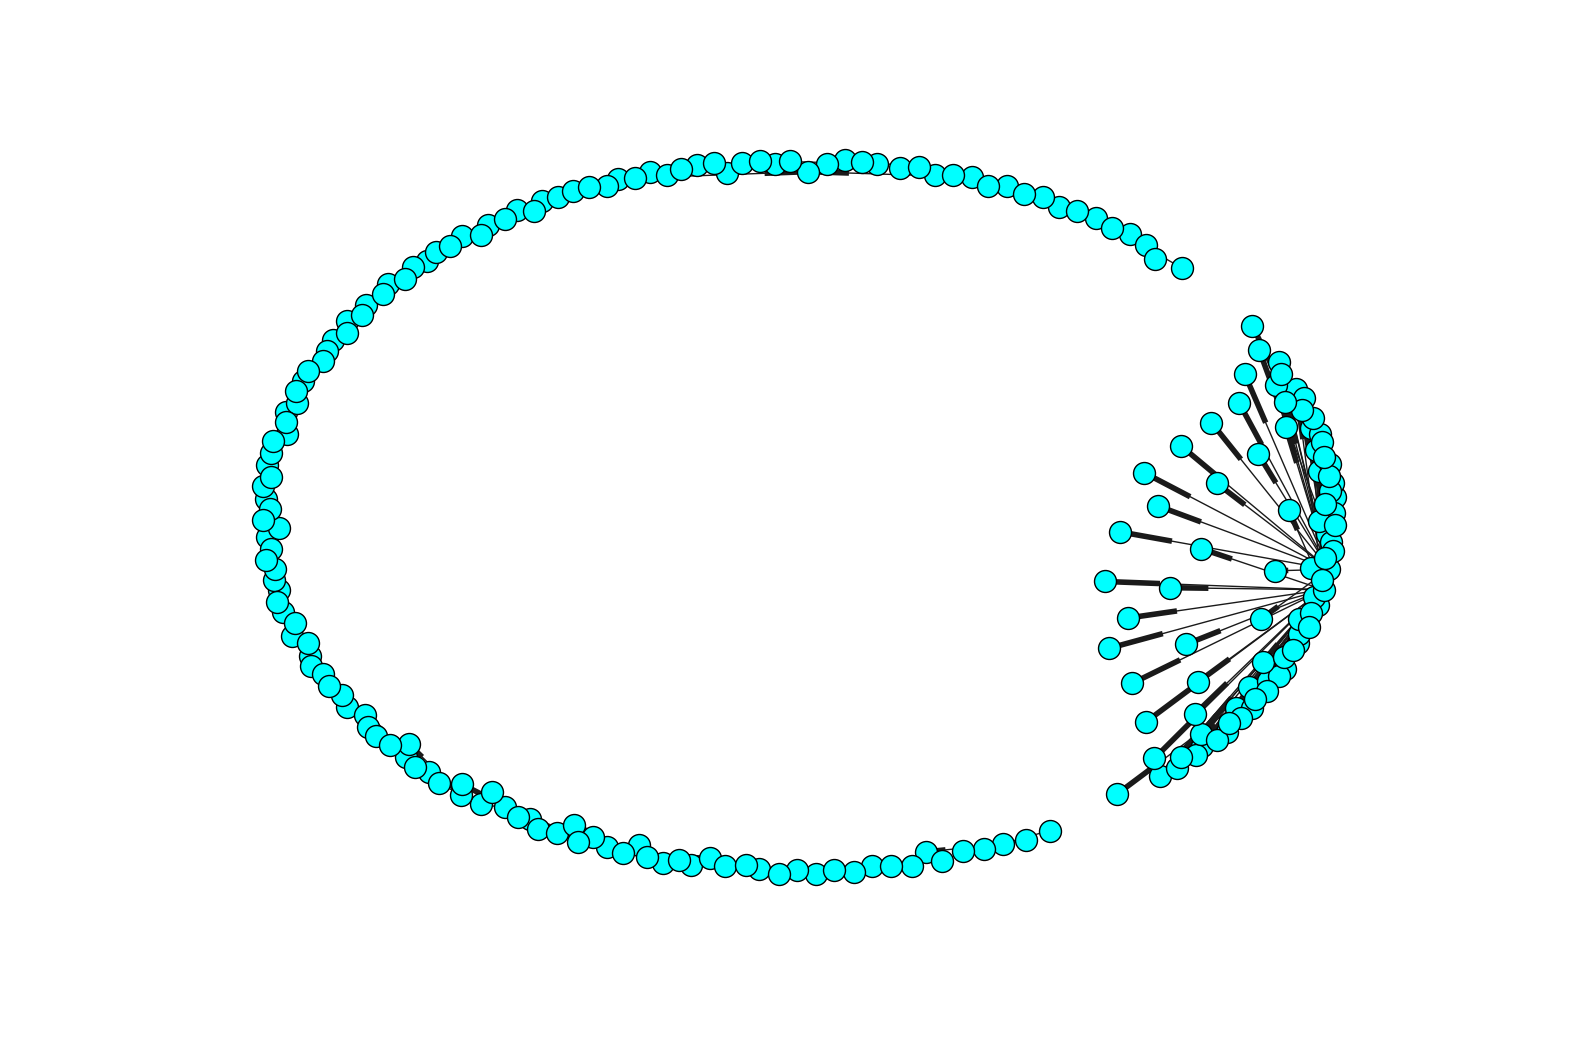

In [60]:
#Creating a network of ALL collected tweets which where retweeted al least once
import networkx as nx
import re

G = nx.DiGraph()
Gp = nx.DiGraph()
dataset = retweeted

weight_time = 0
net_weight = 0

#tweet =>> 0-t_id, 1-text, 2-retweet, 3-time, 4-user, 5-original_id, 6-original_time, 7-original_user

for status in dataset:
    
    #Sends to calculateTime(): "time" (created_at of the retweet), 
    #"original_time" (created_at from the original tweete) and "quantity of positive tweets"
    weight_time = calculateTime(status[6], status[3])
        
    #Creates the edges with: "original_user" (user who posted the original tweete), 
    #"user" (user who retweeted the tweet) and "weight"(Time passed between original tweet and its retweet)
    Gp.add_edge(status[7], status[4], {'weight': '1.0'}) #Version for printing
    G.add_edge(status[7], status[4], {'weight': weight_time})
        
    #Accumulate the times, giving the total amount of time of this network
    net_weight = net_weight + abs(weight_time)
    
            
print "NETWORK OF ALL COLLECTED TWEETS RETWEETED AT LEAST ONCE"
print 
print nx.info(G)
print
print "Graph Accmmulated Weight: %.3f days or %.3f hours." % ((net_weight/86400), (net_weight/3600))
print
print "The average tweeting rate for 'airpod' in the network is %.3f days or %.3f hours." %((net_weight/len(dataset))/86400, (net_weight/len(dataset))/3600)
print

print sorted(nx.degree(G).values())

plt.figure(figsize = (15,10))
nx.draw_spring(Gp, node_size = 250, node_shape='o', edge_color='.1', width=1, width_labels=False, node_color = 'cyan')
plt.show()

### 5.1.1 - EDGES OF THE NETWORK

In [588]:
print "EDGES OF THE NETWORK"

#print "Average time of retweet: %3f minutes or %3f seconds" % (((edges_time-7322626)/(len(G.edges())-1)/60),(edges_time-7322626)/(len(G.edges())-1))
print
all_edges = []
all_times = []
edges_time = 0
for i in range(len(G.edges())):
    all_edges.append((G.edges(data=True)[i][0],G.edges(data=True)[i][1]))
    print G.edges(data=True)[i]
    t = (G.edges(data=True)[i][2]['weight'])/3600
    edges_time = edges_time + t
    all_times.append(t)
#print all_edges

EDGES OF THE NETWORK

(u'CRRRConsultores', u'CristianRosaR', {'weight': 14026.0})
(u'fabianbreschi', u'lion_italia', {'weight': 1792.0})
(u'ElectropageIt', u'stylezuk', {'weight': 1035.0})
(u'applenws', u'ios_digest', {'weight': 31.0})
(u'applenws', u'iOS_rocks9', {'weight': 15107.0})
(u'falsaif', u'D7emv', {'weight': 358200.0})
(u'falsaif', u'althomale', {'weight': 15561.0})
(u'falsaif', u'sayossef', {'weight': 22949.0})
(u'falsaif', u'abduallahalzaml', {'weight': 1722.0})
(u'falsaif', u'7mo0od_25', {'weight': 27332.0})
(u'falsaif', u'Kr00me', {'weight': 363.0})
(u'falsaif', u'RoaAlkudair', {'weight': 3093.0})
(u'falsaif', u'AZIZ_Ghazi', {'weight': 7635.0})
(u'falsaif', u'alhwawe007', {'weight': 39.0})
(u'falsaif', u'AMelibari', {'weight': 9397.0})
(u'falsaif', u'Sulaiman_S85', {'weight': 9767.0})
(u'falsaif', u'annaaas_711', {'weight': 28046.0})
(u'falsaif', u'Engfor1', {'weight': 2736.0})
(u'falsaif', u'PlayGamesHD3', {'weight': 29193.0})
(u'falsaif', u'JiSlE5lqY5l441D', {'weight': 

### 5.1.2 - Eigenvector centrality - 5 most central users

In [85]:
# Eigenvector centrality

# “left”  eigevector centrality corresponds to the in-edges in the graph
# “right” eigevector centrality corresponds to the out-edges in the graph
left_centralityEV  = nx.eigenvector_centrality(G)
right_centralityEV = nx.eigenvector_centrality(G.reverse())

ranking_LEVC = sorted(left_centralityEV, key=left_centralityEV.get, reverse=True)
ranking_REVC = sorted(right_centralityEV, key=right_centralityEV.get, reverse=True)

print "Eigenvector centrality - 5 most central users:"
print
print "---- IN ----:"
for i, p in enumerate(ranking_LEVC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, left_centralityEV[p])

print
print "---- OUT ----:"
for i, p in enumerate(ranking_REVC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, right_centralityEV[p])

Eigenvector centrality - 5 most central users:

---- IN ----:
 1 - MattBarkley (0.705)
 2 - hellobragi (0.705)
 3 - vwmeatball (0.077)
 4 - jarrodpjordan (0.002)
 5 - jessicazamoran1 (0.000)

---- OUT ----:
 1 - hellobragi (1.000)
 2 - Prodigios_EE (0.000)
 3 - harrismix (0.000)
 4 - lion_italia (0.000)
 5 - CRRRConsultores (0.000)


### 5.1.3 - Degree centrality - 5 most central users

In [86]:
# Degree centrality

in_degree_centrality = nx.in_degree_centrality(G)
ranking_IDC = sorted(in_degree_centrality, key=in_degree_centrality.get, reverse=True)

out_degree_centrality = nx.out_degree_centrality(G)
#print centrality_out
ranking_ODC = sorted(out_degree_centrality, key=out_degree_centrality.get, reverse=True)

print "Degree centrality - 5 most central users:"
print
print "---- IN ----:"
for i, p in enumerate(ranking_IDC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, in_degree_centrality[p])

print
print "---- OUT ----:"
for i, p in enumerate(ranking_ODC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, out_degree_centrality[p])

Degree centrality - 5 most central users:

---- IN ----:
 1 - getspekka (0.009)
 2 - lion_italia (0.004)
 3 - clara_foodie (0.004)
 4 - safa_a_d (0.004)
 5 - JianingHollyHe (0.004)

---- OUT ----:
 1 - TheNextWeb (0.210)
 2 - falsaif (0.138)
 3 - ForbesAsia (0.027)
 4 - albaladsa (0.022)
 5 - AnnaZed (0.018)


## 5.2 - NETWORK OF POSITIVE TWEETS

NETWORK OF POSITIVE TWEETS

Name: 
Type: DiGraph
Number of nodes: 60
Number of edges: 44
Average in degree:   0.7333
Average out degree:   0.7333

Graph Accmmulated Weight: 99.398 days or 2385.553 hours.

The average tweeting rate for 'airpod' in the POSITIVE network is 1.988 days or 47.711 hours.

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 24]


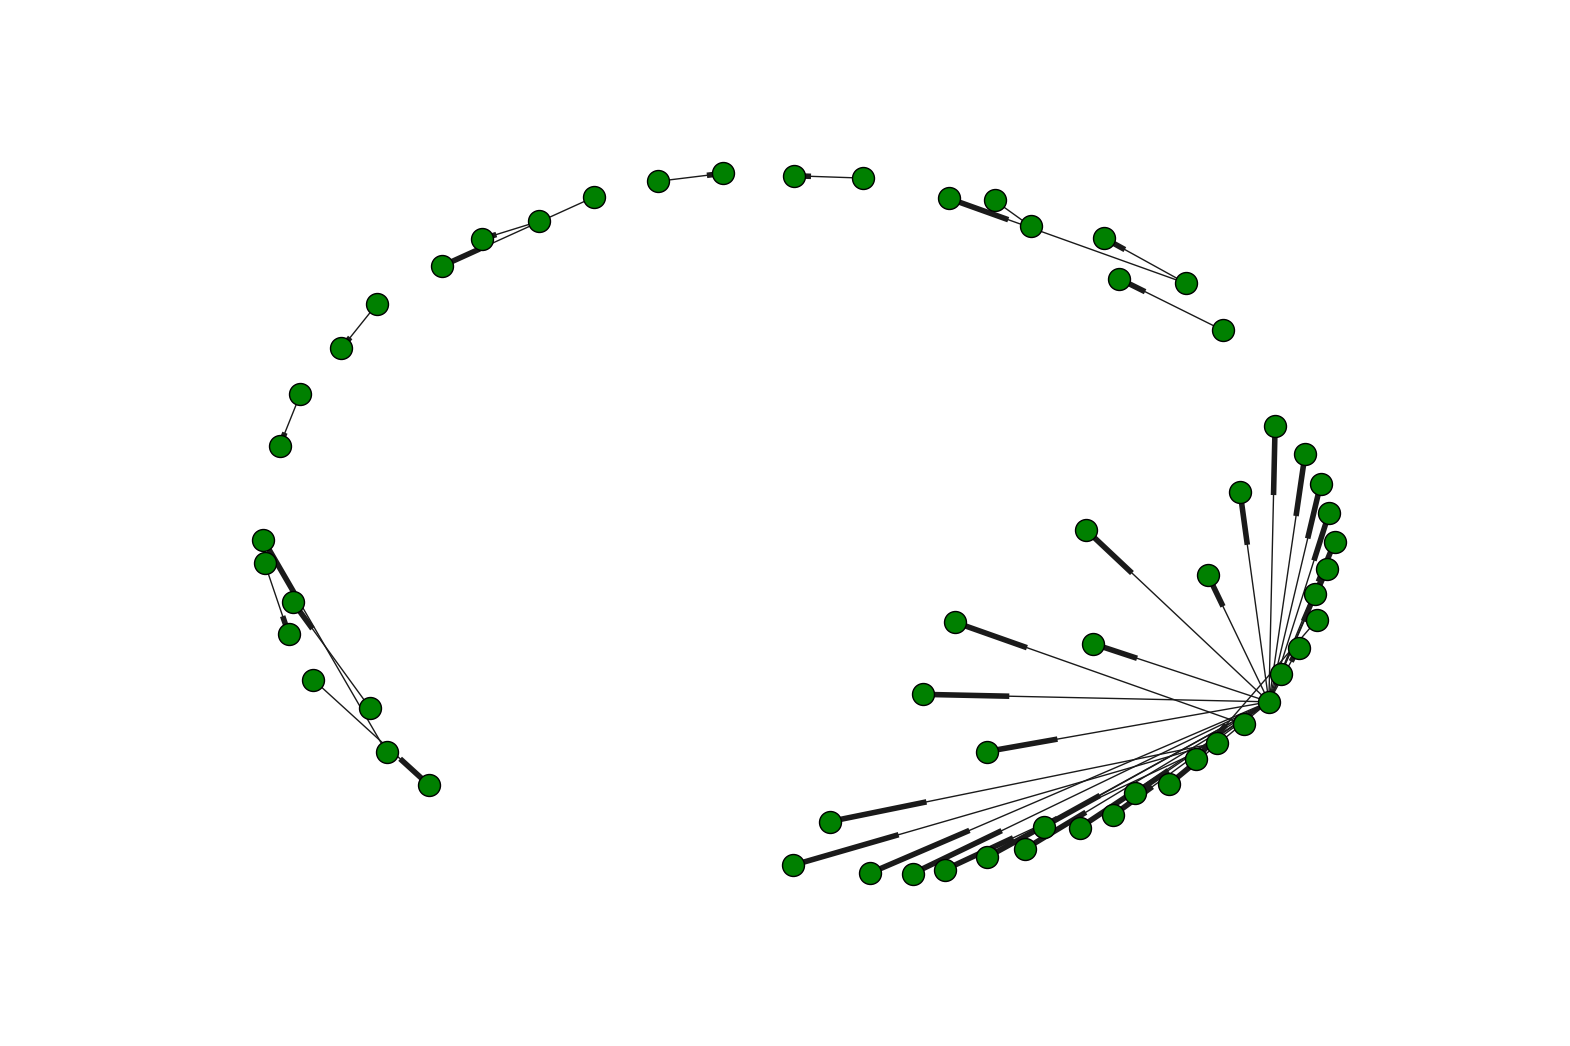

In [88]:
#Creating a network of Positive Tweets
import networkx as nx
import re

Pos_G = nx.DiGraph()
Pos_Gp = nx.DiGraph()
dataset = pos1

weight_time = 0
net_weight = 0

#tweet =>> 0-t_id, 1-text, 2-retweet, 3-time, 4-user, 5-original_id, 6-original_time, 7-original_user

for status in dataset:
    
    #Sends to calculateTime(): "time" (created_at of the retweet), 
    #"original_time" (created_at from the original tweete) and "quantity of positive tweets"
    weight_time = calculateTime(status[6], status[3])
        
    #Creates the edges with: "original_user" (user who posted the original tweete), 
    #"user" (user who retweeted the tweet) and "weight"(Time passed between original tweet and its retweet)
    Pos_Gp.add_edge(status[7], status[4], {'weight': '1.0'}) #Version for printing
    Pos_G.add_edge(status[7], status[4], {'weight': weight_time})
        
    #Accumulate the times, giving the total amount of time of this network
    net_weight = net_weight + abs(weight_time)
    
    #count += 1
            
print "NETWORK OF POSITIVE TWEETS"
print 
print nx.info(Pos_G)
print
print "Graph Accmmulated Weight: %.3f days or %.3f hours." % ((net_weight/86400), (net_weight/3600))
print
print "The average tweeting rate for 'airpod' in the POSITIVE network is %.3f days or %.3f hours." %((net_weight/len(dataset))/86400, (net_weight/len(dataset))/3600)
print

print sorted(nx.degree(Pos_G).values())

plt.figure(figsize = (15,10))
nx.draw_spring(Pos_Gp, node_size = 250, node_shape='o', edge_color='.1', width=1, width_labels=False, node_color = 'green')
plt.show()

### 5.2.1 - EDGES OF THE POSITIVE NETWORK

In [595]:
print "EDGES OF THE POSITIVE NETWORK"
print

edges_time = 0
for i in range(len(Pos_G.edges())):
    print Pos_G.edges(data=True)[i]
    t = Pos_G.edges(data=True)[i][2]['weight']
    edges_time = edges_time + t


EDGES OF THE POSITIVE NETWORK

(u'TNWDeals', u'Nithincn', {'weight': 16126.0})
(u'fabianbreschi', u'lion_italia', {'weight': 1792.0})
(u'ElectropageIt', u'stylezuk', {'weight': 1035.0})
(u'F2DNews', u'clara_foodie', {'weight': 4612.0})
(u'iLuvTra1ls', u'anniedtla', {'weight': 2875.0})
(u'SimonViklund', u'BioRuins', {'weight': 42356.0})
(u'SimonViklund', u'Styx141', {'weight': 1385.0})
(u'endcomputed', u'geminieast7745', {'weight': 5084.0})
(u'rockettechuk', u'SofiaSuarez01', {'weight': 4620.0})
(u'psdwordpress', u'RonaldHeynes', {'weight': 185.0})
(u'CRRRConsultores', u'CristianRosaR', {'weight': 14026.0})
(u'davechensky', u'JianingHollyHe', {'weight': 26625.0})
(u'tuck_hamood', u'alooyalharthi', {'weight': 5547.0})
(u'hellobragi', u'vwmeatball', {'weight': 54459.0})
(u'hellobragi', u'hellobragi', {'weight': 500589.0})
(u'hellobragi', u'jarrodpjordan', {'weight': 1459.0})
(u'hellobragi', u'MattBarkley', {'weight': 500602.0})
(u'MaleMediaMind', u'randallpp3', {'weight': 7483.0})
(u'elec

### 5.2.2 - Eigenvector centrality - 5 most central users

In [89]:
# Eigenvector centrality

left_centralityEV  = nx.eigenvector_centrality(Pos_G)
right_centralityEV = nx.eigenvector_centrality(Pos_G.reverse())

ranking_LEVC = sorted(left_centralityEV, key=left_centralityEV.get, reverse=True)
ranking_REVC = sorted(right_centralityEV, key=right_centralityEV.get, reverse=True)

print "Eigenvector centrality - 5 most central users:"
print
print "---- IN ----:"
for i, p in enumerate(ranking_LEVC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, left_centralityEV[p])

print
print "---- OUT ----:"
for i, p in enumerate(ranking_REVC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, right_centralityEV[p])

Eigenvector centrality - 5 most central users:

---- IN ----:
 1 - MattBarkley (0.705)
 2 - hellobragi (0.705)
 3 - vwmeatball (0.077)
 4 - jarrodpjordan (0.002)
 5 - lion_italia (0.000)

---- OUT ----:
 1 - hellobragi (1.000)
 2 - lion_italia (0.000)
 3 - CRRRConsultores (0.000)
 4 - clara_foodie (0.000)
 5 - TNWDeals (0.000)


### 5.2.3 - Degree centrality - 5 most central users

In [94]:
# Degree centrality
in_degree_centrality = nx.in_degree_centrality(Pos_G)
ranking_IDC = sorted(in_degree_centrality, key=in_degree_centrality.get, reverse=True)

out_degree_centrality = nx.out_degree_centrality(Pos_G)
#print centrality_out
ranking_ODC = sorted(out_degree_centrality, key=out_degree_centrality.get, reverse=True)

print "Degree centrality - 5 most central users:"
print
print "---- IN ----:"
for i, p in enumerate(ranking_IDC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, in_degree_centrality[p])

print
print "---- OUT ----:"
for i, p in enumerate(ranking_ODC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, out_degree_centrality[p])

Degree centrality - 5 most central users:

---- IN ----:
 1 - lion_italia (0.017)
 2 - clara_foodie (0.017)
 3 - stylezuk (0.017)
 4 - JianingHollyHe (0.017)
 5 - zippylab (0.017)

---- OUT ----:
 1 - TheNextWeb (0.407)
 2 - hellobragi (0.068)
 3 - SimonViklund (0.034)
 4 - CRRRConsultores (0.017)
 5 - TNWDeals (0.017)


### 5.2.4 - In-degree X Out-degree

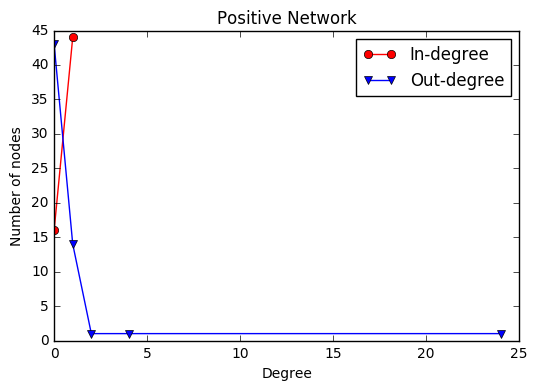

In [617]:
### In-degree X Out-degree
in_degrees = Pos_G.in_degree()
in_values = sorted(set(in_degrees.values()))
in_hist = [in_degrees.values().count(x) for x in in_values]

out_degrees= Pos_G.out_degree()
out_values= sorted(set(out_degrees.values()))
out_hist=[out_degrees.values().count(y) for y in out_values]

plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Positive Network')
plt.show()

## 5.3 - NETWORK OF NEGATIVE TWEETS

NETWORK OF NEGATIVE TWEETS

Name: 
Type: DiGraph
Number of nodes: 172
Number of edges: 126
Average in degree:   0.7326
Average out degree:   0.7326

Graph Accmmulated Weight: 3537.667 days or 84904.019 hours.

The average tweeting rate for 'airpod' in the NEGATIVE network is 20.568 days or 493.628 hours.

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 5, 5, 6, 26, 31]


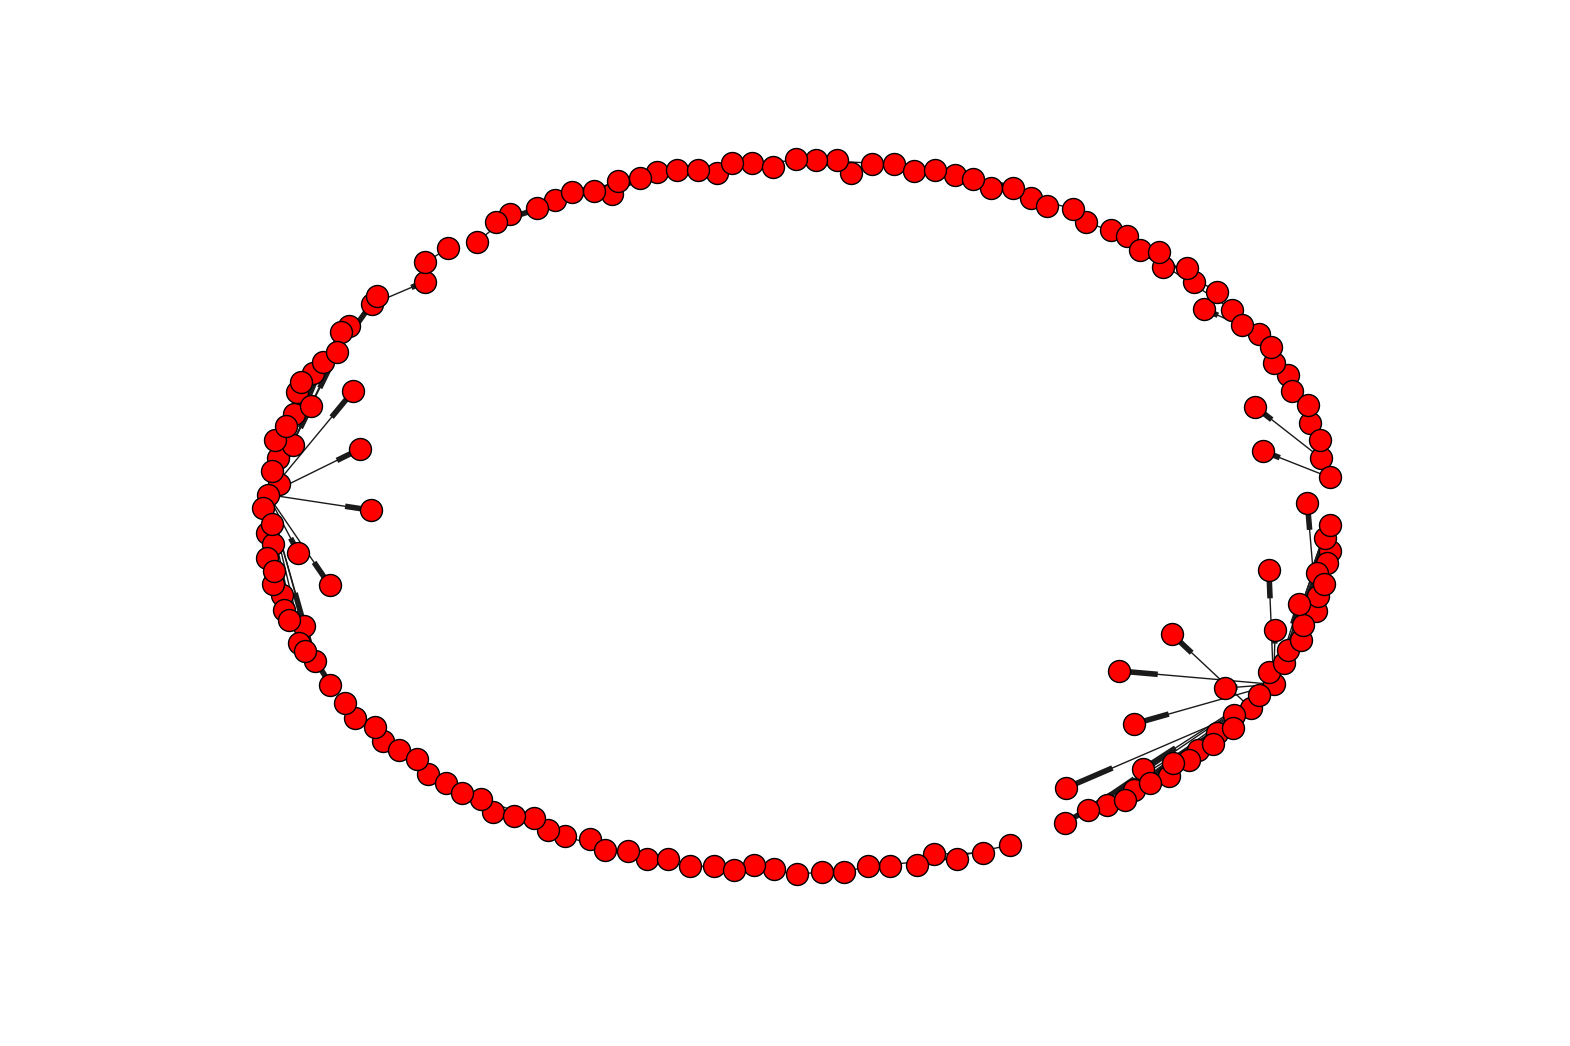

In [91]:
#Creating a network of Negative Tweets
import networkx as nx
import re

Neg_G = nx.DiGraph()
Neg_Gp = nx.DiGraph()
dataset = neg1

weight_time = 0
net_weight = 0

#tweet =>> 0-t_id, 1-text, 2-retweet, 3-time, 4-user, 5-original_id, 6-original_time, 7-original_user

for status in dataset:
    
    #Sends to calculateTime(): "time" (created_at of the retweet), 
    #"original_time" (created_at from the original tweete) and "quantity of positive tweets"
    weight_time = calculateTime(status[6], status[3])
        
    #Creates the edges with: "original_user" (user who posted the original tweete), 
    #"user" (user who retweeted the tweet) and "weight"(Time passed between original tweet and its retweet)
    Neg_Gp.add_edge(status[7], status[4], {'weight': '1.0'}) # Version for printing
    Neg_G.add_edge(status[7], status[4], {'weight': weight_time})
        
    #Accumulate the times, giving the total amount of time of this network
    net_weight = net_weight + abs(weight_time)
    
    #count += 1
            
print "NETWORK OF NEGATIVE TWEETS"
print 

print nx.info(Neg_G)
print

print "Graph Accmmulated Weight: %.3f days or %.3f hours." % ((net_weight/86400), (net_weight/3600))
print

print "The average tweeting rate for 'airpod' in the NEGATIVE network is %.3f days or %.3f hours." %((net_weight/len(dataset))/86400, (net_weight/len(dataset))/3600)
print


print sorted(nx.degree(Neg_G).values())

plt.figure(figsize = (15,10))
nx.draw_spring(Neg_Gp, node_size = 250, node_shape='o', edge_color='.1', width=1, width_labels=False, node_color = 'red')
plt.show()

### 5.3.1 - EDGES OF THE NEGATIVE NETWORK

In [599]:
print "EDGES OF THE NEGATIVE NETWORK"

#print "Average time of retweet: %3f minutes or %3f seconds" % (((edges_time-7322626)/(len(Neg_G.edges())-1)/60),(edges_time-7322626)/(len(Neg_G.edges())-1))
#print "Average time of retweet: %3f days or %3f hours or %3f minutes or %3f seconds" % ( ((edges_time)/((len(Neg_G.edges())))/86400), ((edges_time)/((len(Neg_G.edges())))/3600), (((edges_time)/(len(Neg_G.edges())))/60),(edges_time)/(len(Neg_G.edges())) )
print

edges_time = 0
for i in range(len(Neg_G.edges())):
    print Neg_G.edges(data=True)[i]
    t = Neg_G.edges(data=True)[i][2]['weight']
    edges_time = edges_time + t


EDGES OF THE NEGATIVE NETWORK

(u'applenws', u'ios_digest', {'weight': 31.0})
(u'applenws', u'iOS_rocks9', {'weight': 15107.0})
(u'falsaif', u'D7emv', {'weight': 358200.0})
(u'falsaif', u'althomale', {'weight': 15561.0})
(u'falsaif', u'sayossef', {'weight': 22949.0})
(u'falsaif', u'abduallahalzaml', {'weight': 1722.0})
(u'falsaif', u'7mo0od_25', {'weight': 27332.0})
(u'falsaif', u'Kr00me', {'weight': 363.0})
(u'falsaif', u'RoaAlkudair', {'weight': 3093.0})
(u'falsaif', u'AZIZ_Ghazi', {'weight': 7635.0})
(u'falsaif', u'alhwawe007', {'weight': 39.0})
(u'falsaif', u'AMelibari', {'weight': 9397.0})
(u'falsaif', u'Sulaiman_S85', {'weight': 9767.0})
(u'falsaif', u'annaaas_711', {'weight': 28046.0})
(u'falsaif', u'Engfor1', {'weight': 2736.0})
(u'falsaif', u'PlayGamesHD3', {'weight': 29193.0})
(u'falsaif', u'JiSlE5lqY5l441D', {'weight': 3941.0})
(u'falsaif', u'waloode4', {'weight': 61320.0})
(u'falsaif', u'aljanabi_sameer', {'weight': 7047.0})
(u'falsaif', u'mshoish', {'weight': 4837.0})
(u'f

### 5.3.2 - Eigenvector centrality - 5 most central users

In [92]:
# Eigenvector centrality

# “left”  eigevector centrality corresponds to the in-edges in the graph
# “right” eigevector centrality corresponds to the out-edges in the graph
left_centralityEV  = nx.eigenvector_centrality(Neg_G)
right_centralityEV = nx.eigenvector_centrality(Neg_G.reverse())

ranking_LEVC = sorted(left_centralityEV, key=left_centralityEV.get, reverse=True)
ranking_REVC = sorted(right_centralityEV, key=right_centralityEV.get, reverse=True)

print "Eigenvector centrality - 5 most central users:"
print
print "---- IN ----:"
for i, p in enumerate(ranking_LEVC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, left_centralityEV[p])

print
print "---- OUT ----:"
for i, p in enumerate(ranking_REVC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, right_centralityEV[p])

Eigenvector centrality - 5 most central users:

---- IN ----:
 1 - jessicazamoran1 (0.742)
 2 - Prodigios_EE (0.668)
 3 - MaryJurjo (0.054)
 4 - elespanolcom (0.006)
 5 - harrismix (0.000)

---- OUT ----:
 1 - Prodigios_EE (1.000)
 2 - harrismix (0.000)
 3 - DigitalCrissy (0.000)
 4 - beaucurtis (0.000)
 5 - safa_a_d (0.000)


### 5.3.3 - Degree centrality - 5 most central users

In [93]:
# Degree centrality

in_degree_centrality = nx.in_degree_centrality(Neg_G)
ranking_IDC = sorted(in_degree_centrality, key=in_degree_centrality.get, reverse=True)

out_degree_centrality = nx.out_degree_centrality(Neg_G)
#print centrality_out
ranking_ODC = sorted(out_degree_centrality, key=out_degree_centrality.get, reverse=True)

print "Degree centrality - 5 most central users:"
print
print "---- IN ----:"
for i, p in enumerate(ranking_IDC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, in_degree_centrality[p])

print
print "---- OUT ----:"
for i, p in enumerate(ranking_ODC[:5]):
    print " %d - %s (%.3f)" % (i+1, p, out_degree_centrality[p])

Degree centrality - 5 most central users:

---- IN ----:
 1 - DigitalCrissy (0.006)
 2 - safa_a_d (0.006)
 3 - zippylab (0.006)
 4 - MaryJurjo (0.006)
 5 - iOS_rocks9 (0.006)

---- OUT ----:
 1 - falsaif (0.181)
 2 - TheNextWeb (0.152)
 3 - ForbesAsia (0.035)
 4 - albaladsa (0.029)
 5 - AnnaZed (0.023)


### 5.3.4 - In-degree X Out-degree

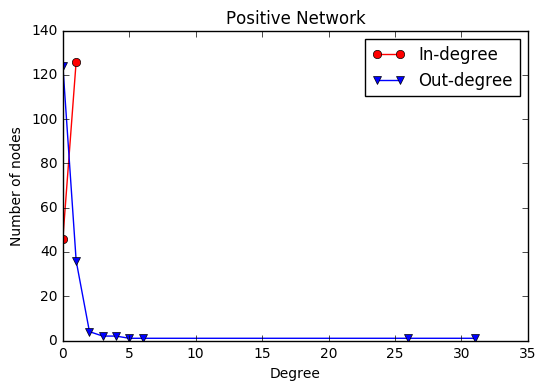

In [618]:
### In-degree X Out-degree
in_degrees = Neg_G.in_degree()
in_values = sorted(set(in_degrees.values()))
in_hist = [in_degrees.values().count(x) for x in in_values]

out_degrees= Neg_G.out_degree()
out_values= sorted(set(out_degrees.values()))
out_hist=[out_degrees.values().count(y) for y in out_values]

plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Positive Network')
plt.show()

# 6 - COMPARISON ANALYSIS - POSITIVE X NEGATIVE NETWORKS

## 6.1 - Comparisons of Numbers

In [678]:
#Number of nodes ###########################################################################################
print "NUMBER OF NODES:"
print "TOTAL network:", G.number_of_nodes()
print "Negative network:", Neg_G.number_of_nodes()
print "Positive network:", Pos_G.number_of_nodes()
print "Rate Negative/Positive Nodes:", Neg_G.number_of_nodes()/Pos_G.number_of_nodes()
print

#Number of edges ###########################################################################################
print "NUMBER OF EDGES:"
print "TOTAL network:", G.number_of_edges()
print "Negative network:", Neg_G.number_of_edges()
print "Positive network:", Pos_G.number_of_edges()
print "Rate Negative/Positive Edges:", Neg_G.number_of_edges()/Pos_G.number_of_edges()
print

#Average degree ###########################################################################################
#Total ntw
median_listT = []
avg_listT =[]
for i in G:
    avg_listT.append(G.degree(i))
    median_listT.append(G.degree(i))
middleT=len(median_listT)/2

#Negative ntw
median_list = []
avg_list =[]
for i in Neg_G:
    avg_list.append(Neg_G.degree(i))
    median_list.append(Neg_G.degree(i))
middle=len(median_list)/2

#Positive ntw
median_listP = []
avg_listP =[]
for i in Pos_G:
    avg_listP.append(Pos_G.degree(i))
    median_listP.append(Pos_G.degree(i))
middleP=len(median_listP)/2

print "AVERAGE DEGREE:"
print "TOTAL Network - Average degree: %r" %np.average(avg_listT)
print "Negative Network - Average degree: %r" %np.average(avg_list)
print "Positive Network - Average degree: %r" %np.average(avg_listP)
print

#Average degree ###########################################################################################
print "MEDIAN DEGREE:"
print "TOTAL Network - Median degree: %r" %float(median_listT[int(middleT)])
print "Negative Network - Median degree: %r" %float(median_list[int(middle)])
print "Positive Network - Median degree: %r" %float(median_listP[int(middleP)])


NUMBER OF NODES:
TOTAL network: 225
Negative network: 172
Positive network: 60
Rate Negative/Positive Nodes: 2.86666666667

NUMBER OF EDGES:
TOTAL network: 166
Negative network: 126
Positive network: 44
Rate Negative/Positive Edges: 2.86363636364

AVERAGE DEGREE:
TOTAL Network - Average degree: 1.4755555555555555
Negative Network - Average degree: 1.4651162790697674
Positive Network - Average degree: 1.4666666666666666

MEDIAN DEGREE:
TOTAL Network - Median degree: 1.0
Negative Network - Median degree: 1.0
Positive Network - Median degree: 1.0


## 6.2 - Positive X Negative - Out-Degree

Positive Network - Out-degrees values: [0, 1, 2, 4, 24]
Negative Network - Out-degrees values: [0, 1, 2, 3, 4, 5, 6, 26, 31]


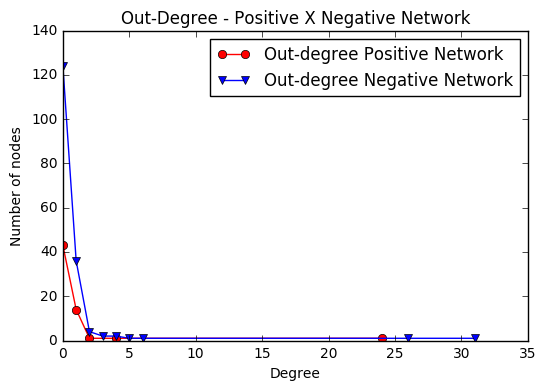

In [623]:
out_degrees_Pos = Pos_G.out_degree()
out_values_Pos = sorted(set(out_degrees_Pos.values()))
out_hist_Pos = [out_degrees_Pos.values().count(x) for x in out_values_Pos]

out_degrees_Neg= Neg_G.out_degree()
out_values_Neg= sorted(set(out_degrees_Neg.values()))
out_hist_Neg=[out_degrees_Neg.values().count(y) for y in out_values_Neg]

print "Positive Network - Out-degrees values:", out_values_Pos
print "Negative Network - Out-degrees values:", out_values_Neg

plt.figure()
plt.plot(out_values_Pos,out_hist_Pos,'ro-') # in-degree
plt.plot(out_values_Neg,out_hist_Neg,'bv-') # out-degree
plt.legend(['Out-degree Positive Network','Out-degree Negative Network'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Out-Degree - Positive X Negative Network')
plt.show()

## 6.2 - Positive X Negative - In-Degree

Positive Network - IN-degrees values: [0, 1]
Negative Network - IN-degrees values: [0, 1]


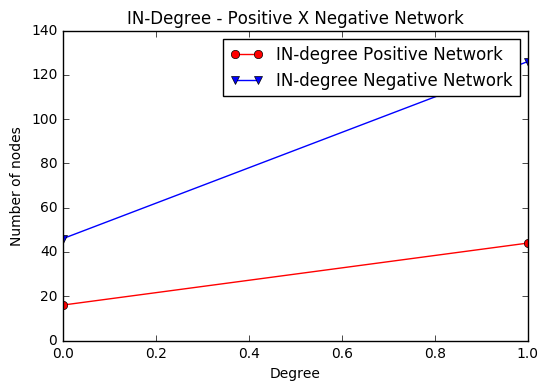

In [95]:
in_degrees_Pos = Pos_G.in_degree()
in_values_Pos = sorted(set(in_degrees_Pos.values()))
in_hist_Pos = [in_degrees_Pos.values().count(x) for x in in_values_Pos]

in_degrees_Neg= Neg_G.in_degree()
in_values_Neg= sorted(set(in_degrees_Neg.values()))
in_hist_Neg=[in_degrees_Neg.values().count(y) for y in in_values_Neg]

print "Positive Network - IN-degrees values:", in_values_Pos
print "Negative Network - IN-degrees values:", in_values_Neg

plt.figure()
plt.plot(in_values_Pos,in_hist_Pos,'ro-') # in-degree
plt.plot(in_values_Neg,in_hist_Neg,'bv-') # out-degree
plt.legend(['IN-degree Positive Network','IN-degree Negative Network'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('IN-Degree - Positive X Negative Network')
plt.show()